In [15]:
import numpy as np
import pandas as pd

data = pd.read_csv('sensor1.csv')
ori_len = len(data)

data


,datetime,date,time,tp01,do01,ph01,wl01,wm01
0,2020-01-01 00:01:00,2020-01-01,0:01,22.9,9.02,7.44,0,0.7
1,2020-01-01 00:11:00,2020-01-01,0:11,22.8,8.97,7.57,0,0.7
2,2020-01-01 00:21:00,2020-01-01,0:21,22.8,8.81,7.45,0,0.7
3,2020-01-01 00:31:00,2020-01-01,0:31,22.8,8.83,7.51,0,0.7
4,2020-01-01 00:41:00,2020-01-01,0:41,22.9,8.97,7.83,0,0.7
...,...,...,...,...,...,...,...,...
25682,2020-07-15 15:50:00,2020-07-15,15:50,27.7,7.58,7.76,0,0.5
25683,2020-07-15 16:00:00,2020-07-15,16:00,27.7,7.54,8.08,0,0.5
25684,2020-07-15 16:10:00,2020-07-15,16:10,27.6,7.65,7.88,0,0.5
25685,2020-07-15 16:20:00,2020-07-15,16:20,27.6,7.55,8.15,0,0.5


In [16]:
## ph, do, tp 3개 항목에 대해서 하나라도 0 값이 있으면
## row  제거
data = data[data['ph01']>0]
data = data[data['do01']>0]
data = data[data['tp01']>0]
rmz_len = len(data)



In [17]:
data.describe()
# 25680

,tp01,do01,ph01,wl01,wm01
count,25680.000000,25680.000000,25680.000000,25680.000000,25680.000000
mean,21.158474,7.421694,7.591579,-1.029595,0.576842
std,2.630488,1.412214,0.681582,12.377211,0.205879
min,15.200000,0.430000,4.940000,-269.000000,0.000000
25%,19.200000,6.780000,7.330000,0.000000,0.500000
50%,21.100000,7.370000,7.650000,0.000000,0.500000
75%,23.200000,8.040000,7.980000,0.000000,0.800000
max,28.300000,11.820000,12.020000,0.000000,0.800000


In [18]:
data = data.to_numpy()

In [19]:
import itertools
count = 0
delet_list = []
for i in range(0,len(data) -1):
    ## 중복된 인덱스 저장
    
    if np.array_equal(data[i][3:], data[i+1][3:]) :
        #print(data[i][1:], data[i+1][1:])
        delet_list.append(i+1)
    else:
        pass
## 중복된 인덱스 제거
data1 = np.array(list(itertools.compress(data, [i not in delet_list for i in range(len(data))])))

print("전체데이터 갯수 : ",ori_len)
print("0값 갯수 :" , ori_len - rmz_len)
print("0값 제거 갯수 : ",rmz_len)
print("다음라인과 중복된 데이터 수 : ",len(delet_list))
print("전체 데이터 수 : ",len(data))
print("중복 제거후 전체 데이터 수",len(data1))
        

        

전체데이터 갯수 :  25687
0값 갯수 : 7
0값 제거 갯수 :  25680
다음라인과 중복된 데이터 수 :  5274
전체 데이터 수 :  25680
중복 제거후 전체 데이터 수 20406


In [20]:
data1

array([['2020-01-01 00:01:00', '2020-01-01', '0:01', ..., 7.44, 0, 0.7],
       ['2020-01-01 00:11:00', '2020-01-01', '0:11', ..., 7.57, 0, 0.7],
       ['2020-01-01 00:21:00', '2020-01-01', '0:21', ..., 7.45, 0, 0.7],
       ...,
       ['2020-07-15 16:10:00', '2020-07-15', '16:10', ..., 7.88, 0, 0.5],
       ['2020-07-15 16:20:00', '2020-07-15', '16:20', ..., 8.15, 0, 0.5],
       ['2020-07-15 16:30:00', '2020-07-15', '16:30', ..., 8.22, 0, 0.5]],
      dtype=object)

In [21]:
data2 = pd.DataFrame(data1)
data2

,0,1,2,3,4,5,6,7
0,2020-01-01 00:01:00,2020-01-01,0:01,22.9,9.02,7.44,0,0.7
1,2020-01-01 00:11:00,2020-01-01,0:11,22.8,8.97,7.57,0,0.7
2,2020-01-01 00:21:00,2020-01-01,0:21,22.8,8.81,7.45,0,0.7
3,2020-01-01 00:31:00,2020-01-01,0:31,22.8,8.83,7.51,0,0.7
4,2020-01-01 00:41:00,2020-01-01,0:41,22.9,8.97,7.83,0,0.7
...,...,...,...,...,...,...,...,...
20401,2020-07-15 15:50:00,2020-07-15,15:50,27.7,7.58,7.76,0,0.5
20402,2020-07-15 16:00:00,2020-07-15,16:00,27.7,7.54,8.08,0,0.5
20403,2020-07-15 16:10:00,2020-07-15,16:10,27.6,7.65,7.88,0,0.5
20404,2020-07-15 16:20:00,2020-07-15,16:20,27.6,7.55,8.15,0,0.5


In [22]:
data2.columns = ['datetime','date','time','tp01','do01','ph01','wl01','wm01']
data2

,datetime,date,time,tp01,do01,ph01,wl01,wm01
0,2020-01-01 00:01:00,2020-01-01,0:01,22.9,9.02,7.44,0,0.7
1,2020-01-01 00:11:00,2020-01-01,0:11,22.8,8.97,7.57,0,0.7
2,2020-01-01 00:21:00,2020-01-01,0:21,22.8,8.81,7.45,0,0.7
3,2020-01-01 00:31:00,2020-01-01,0:31,22.8,8.83,7.51,0,0.7
4,2020-01-01 00:41:00,2020-01-01,0:41,22.9,8.97,7.83,0,0.7
...,...,...,...,...,...,...,...,...
20401,2020-07-15 15:50:00,2020-07-15,15:50,27.7,7.58,7.76,0,0.5
20402,2020-07-15 16:00:00,2020-07-15,16:00,27.7,7.54,8.08,0,0.5
20403,2020-07-15 16:10:00,2020-07-15,16:10,27.6,7.65,7.88,0,0.5
20404,2020-07-15 16:20:00,2020-07-15,16:20,27.6,7.55,8.15,0,0.5


In [23]:
print(type(data2))
data2['datetime']=pd.to_datetime(data2['datetime'], format='%Y-%m-%d %H:%M:%S',errors = 'raise')
data2

<class 'pandas.core.frame.DataFrame'>


,datetime,date,time,tp01,do01,ph01,wl01,wm01
0,2020-01-01 00:01:00,2020-01-01,0:01,22.9,9.02,7.44,0,0.7
1,2020-01-01 00:11:00,2020-01-01,0:11,22.8,8.97,7.57,0,0.7
2,2020-01-01 00:21:00,2020-01-01,0:21,22.8,8.81,7.45,0,0.7
3,2020-01-01 00:31:00,2020-01-01,0:31,22.8,8.83,7.51,0,0.7
4,2020-01-01 00:41:00,2020-01-01,0:41,22.9,8.97,7.83,0,0.7
...,...,...,...,...,...,...,...,...
20401,2020-07-15 15:50:00,2020-07-15,15:50,27.7,7.58,7.76,0,0.5
20402,2020-07-15 16:00:00,2020-07-15,16:00,27.7,7.54,8.08,0,0.5
20403,2020-07-15 16:10:00,2020-07-15,16:10,27.6,7.65,7.88,0,0.5
20404,2020-07-15 16:20:00,2020-07-15,16:20,27.6,7.55,8.15,0,0.5


In [24]:
temp = data2[['datetime','tp01']].reset_index(drop = True)
temp = temp.rename(columns={'datetime':'ds', 'tp01':'y'})

do = data2[['datetime','do01']].reset_index(drop = True)
do = do.rename(columns={'datetime':'ds', 'do01':'y'})

ph = data2[['datetime','ph01']].reset_index(drop = True)
ph = ph.rename(columns={'datetime':'ds', 'ph01':'y'})

wl = data2[['datetime','wl01']].reset_index(drop = True)
wl = wl.rename(columns={'datetime':'ds', 'wl01':'y'})

wm = data2[['datetime','wm01']].reset_index(drop = True)
wm = wm.rename(columns={'datetime':'ds', 'wm01':'y'})

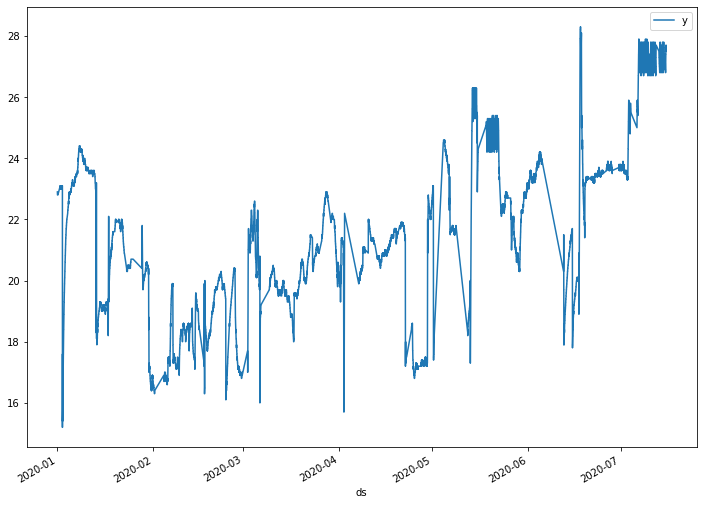

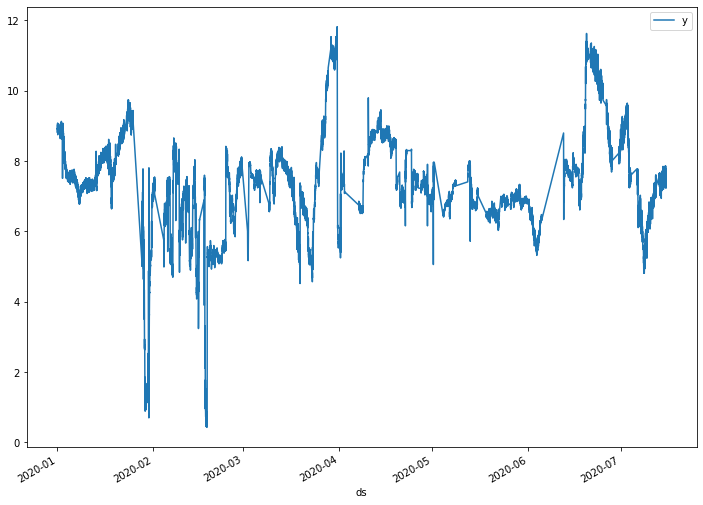

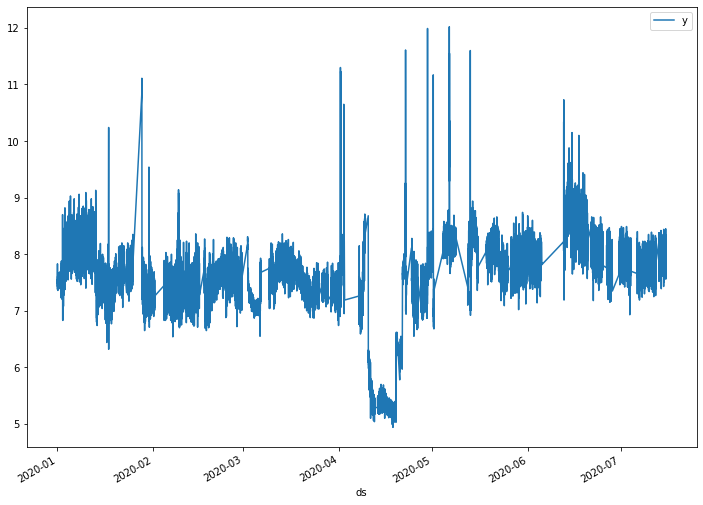

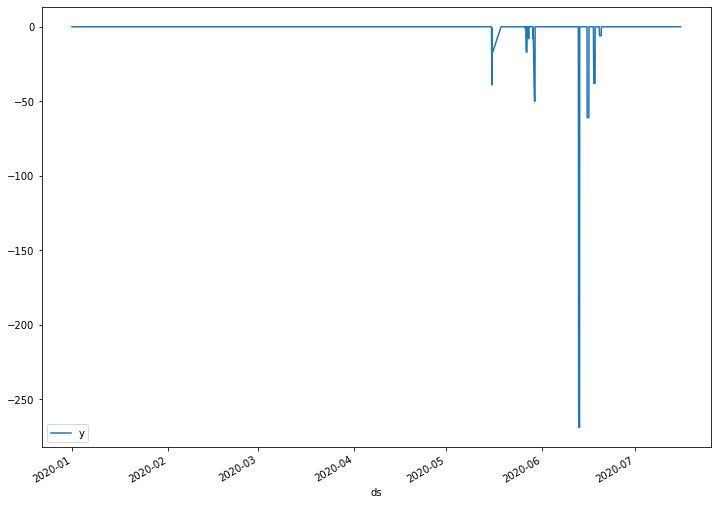

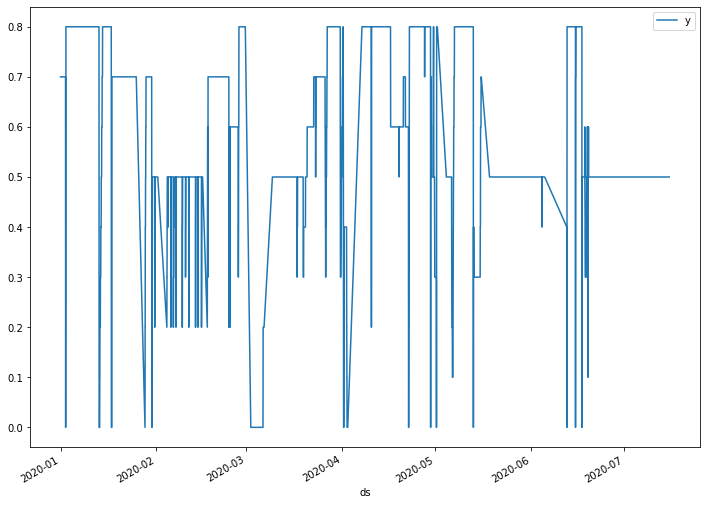

In [25]:
var_list = [temp,do,ph,wl,wm]
for a in var_list:
    a.plot(x = 'ds', y ='y', figsize=(12,9))

In [12]:
from matplotlib import pyplot as plt
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter
from fbprophet import Prophet

model1 = Prophet()
model1.fit(temp)

model2 = Prophet()
model2.fit(do)

model3 = Prophet()
model3.fit(ph)

model4 = Prophet()
model4.fit(wl)

model5 = Prophet()
model5.fit(wm)


future=model1.make_future_dataframe(periods=30)
forecast_temp = model1.predict(future)
forecast_temp.tail()

future=model2.make_future_dataframe(periods=30)
forecast_rain = model2.predict(future)
forecast_rain.tail()

future=model3.make_future_dataframe(periods=30)
forecast_rain = model3.predict(future)
forecast_rain.tail()

future=model4.make_future_dataframe(periods=30)
forecast_rain = model4.predict(future)
forecast_rain.tail()

future=model5.make_future_dataframe(periods=30)
forecast_rain = model5.predict(future)
forecast_rain.tail()

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
